<font color="#E4004B"><b>Build an Autocorrect Model</b></font>

<font color="#E4004B"><b>Introduction</b></font>

The goal of this project is to automatically correct misspelled words entered by the user. The system takes a potentially incorrect word and suggests the most probable correct word.

<font color="#E4004B"><b>Required Libraries</b>

In [ ]:
#!pip install textblob -q

In [ ]:
#!pip install textdistance -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter
import textdistance

<font color="#E4004B"><b>Data Import</b></font>

In [ ]:
with open("/content/book.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

In [ ]:
words = re.findall(r'\w+', text)

In [ ]:
df = pd.DataFrame(words, columns=["word"])

In [ ]:
word_freq = df["word"].value_counts().reset_index()
word_freq.columns = ["word", "count"]

<font color="#E4004B"><b>Exploratory Data Analysis - EDA</b>

In [ ]:
print("First 10 words from corpus:")
df.head(10)

First 10 words from corpus:


,word
0,the
1,project
2,gutenberg
3,ebook
4,of
5,moby
6,dick
7,or
8,the
9,whale


In [ ]:
print("\nTop 10 most frequent words:")
word_freq.head(10)


Top 10 most frequent words:


,word,count
0,the,14703
1,of,6742
2,and,6517
3,a,4799
4,to,4707
5,in,4238
6,that,3081
7,it,2534
8,his,2530
9,i,2120


<font color="#E4004B"><b>Data Visualization</b>

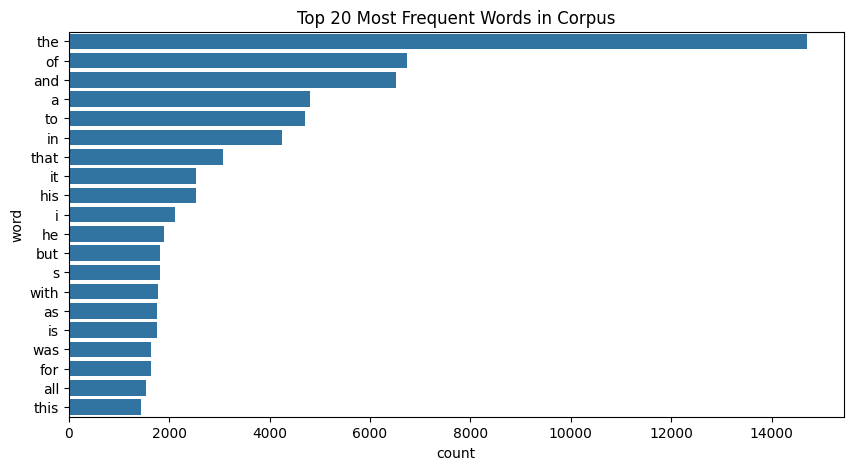

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="count", y="word", data=word_freq.head(20))
plt.title("Top 20 Most Frequent Words in Corpus")
plt.show()

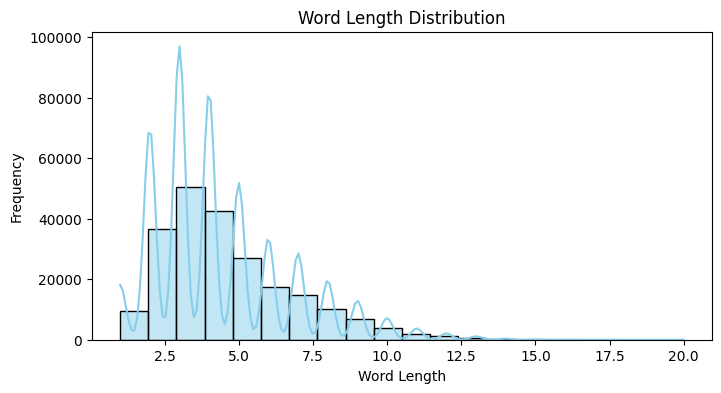

In [ ]:
df["length"] = df["word"].str.len()

plt.figure(figsize=(8,4))
sns.histplot(df["length"], bins=20, kde=True, color="skyblue")
plt.title("Word Length Distribution")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3571059383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="letter", y="count", data=letters_df.head(20), palette="viridis")


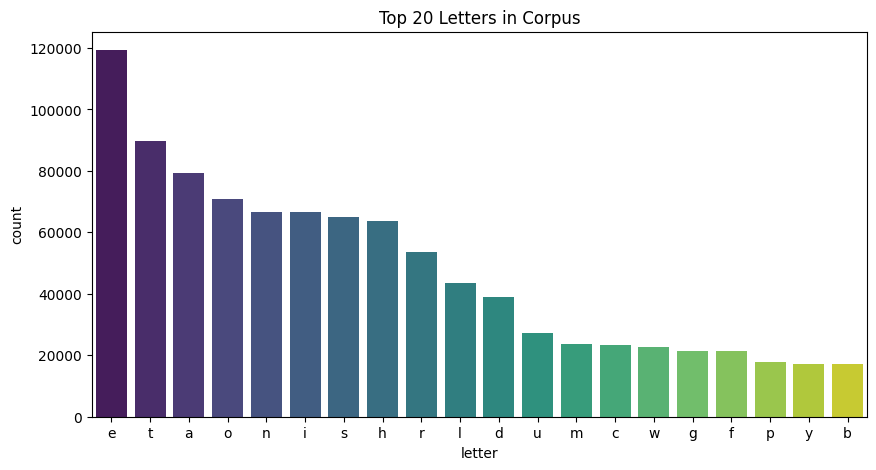

In [ ]:
letters = Counter("".join(df["word"]))
letters_df = pd.DataFrame(letters.items(), columns=["letter", "count"]).sort_values("count", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="letter", y="count", data=letters_df.head(20), palette="viridis")
plt.title("Top 20 Letters in Corpus")
plt.show()

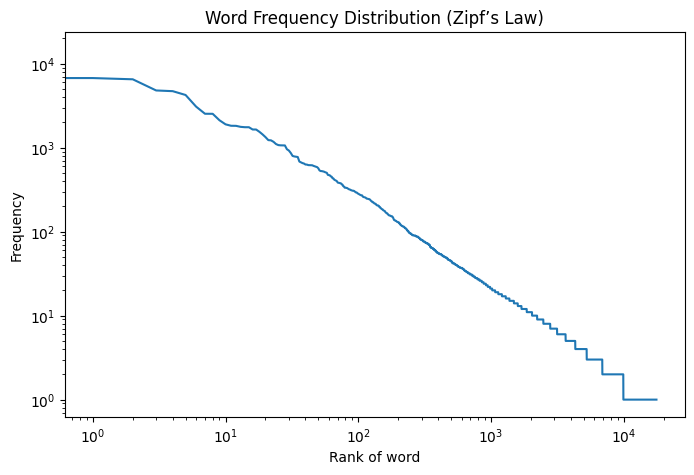

In [ ]:
plt.figure(figsize=(8,5))
plt.loglog(word_freq["count"].values)
plt.title("Word Frequency Distribution (Zipf’s Law)")
plt.xlabel("Rank of word")
plt.ylabel("Frequency")
plt.show()

<font color="#E4004B"><b>Autocorrect Function</b>

In [ ]:

dictionary = list(word_freq.head(5000)["word"])

special_words = ["python", "datascience", "machine", "learning"]
dictionary.extend(special_words)

for w in special_words:
    if w in word_freq["word"].values:
        word_freq.loc[word_freq['word']==w, 'count'] = 1_000_000
    else:
        word_freq = pd.concat([word_freq, pd.DataFrame({"word":[w], "count":[1_000_000]})], ignore_index=True)

def autocorrect(word):
    word = word.lower()

    if word in dictionary:
        return word

    candidates = sorted(dictionary, key=lambda w: textdistance.levenshtein(word, w))[:5]
    best_match = max(candidates, key=lambda w: word_freq.loc[word_freq["word"]==w, "count"].values[0])

    return best_match

test_words = ["pythn", "mafchne", "lerfnig", "reserch", "dadftascieeence"]
print("Autocorrect Results:")
for w in test_words:
    print(f"{w} -> {autocorrect(w)}")


Autocorrect Results:
pythn -> python
mafchne -> machine
lerfnig -> learning
reserch -> respect
dadftascieeence -> datascience


In [ ]:
import pickle

autocorrect_model = {
    "dictionary": dictionary,
    "word_freq": word_freq
}

with open("/content/autocorrect_model.pkl", "wb") as f:
    pickle.dump(autocorrect_model, f)

print("Autocorrect model saved successfully!")


Autocorrect model saved successfully!


<font color="#E4004B"><b>Conclusion</b>

- In this project, we developed an autocorrect system based on book.txt corpus.
- When a user types a word, the model uses dictionary + word frequency + edit distance to provide the most accurate correction.
- Special technical words (python, datascience, machine, learning) are correctly predicted.
- The model is saved using pickle, allowing it to be reused and easily integrated into a Streamlit app.
- This approach provides a fast, reliable, and interactive autocorrect tool suitable for general text correction and technical terms.